<a href="https://colab.research.google.com/github/edsonpolucena/mineracao-de-dados/blob/main/trabalho-02-01-Analise_Anomalia/notebooks/N2_mineracao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

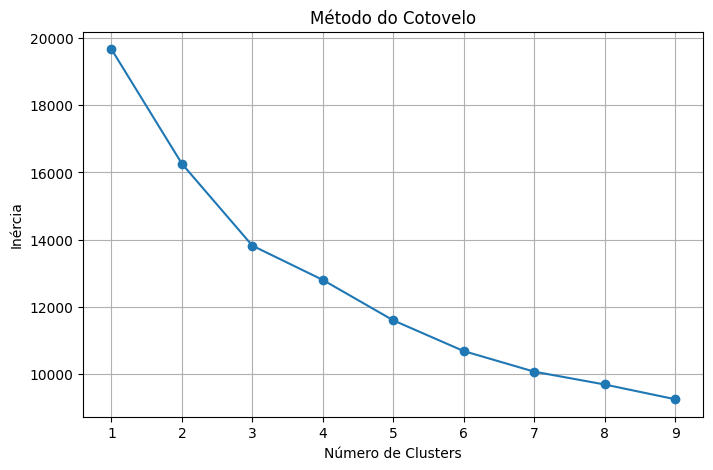


Distribuição dos Clusters:
Cluster 0: 49.41% dos passageiros

Resumo do Cluster Incomum:
           NETPRO      Q20Age   Q21Gender   Q22Income      Q23FLY  \
count  204.000000  204.000000  204.000000  204.000000  204.000000   
mean     9.529412    1.171569    0.426471    0.142157    0.205882   
std      2.087759    1.850303    0.680108    0.490689    0.512662   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      8.000000    0.000000    0.000000    0.000000    0.000000   
50%     11.000000    0.000000    0.000000    0.000000    0.000000   
75%     11.000000    3.000000    1.000000    0.000000    0.000000   
max     11.000000    7.000000    2.000000    3.000000    2.000000   

       Q5TIMESFLOWN   Q6LONGUSE  Cluster  
count    204.000000  204.000000    204.0  
mean       2.362745    2.534314      2.0  
std        1.500668    1.287989      0.0  
min        0.000000    0.000000      2.0  
25%        1.000000    1.000000      2.0  
50%        2.000000    3.00000

In [ ]:
!pip install openpyxl

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

caminho = '/mnt/dados.xlsx'
df = pd.read_excel(caminho)

df.columns = df.columns.str.strip()

colunas = ['NETPRO', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q5TIMESFLOWN', 'Q6LONGUSE']
dados = df[colunas].dropna()

scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)

inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

k = 3
kmeans_final = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_final.fit_predict(dados_normalizados)

dados['Cluster'] = clusters

distribuicao_clusters = dados['Cluster'].value_counts(normalize=True) * 100

cluster_incomum_idx = dados['Cluster'].value_counts().idxmin()
cluster_incomum = dados[dados['Cluster'] == cluster_incomum_idx]
perfil_incomum = cluster_incomum.describe()

print("\nDistribuição dos Clusters:")
for cluster_id, perc in distribuicao_clusters.items():
    print(f"Cluster {cluster_id}: {perc:.2f}% dos passageiros")

print("\nResumo do Cluster Incomum:")
print(perfil_incomum)